In [64]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.12.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (47 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1

In [4]:
import os
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [152]:
def split_data(dataset_path, split_dataset_path, split_ratio):
    categories = ['PCOS', 'normal']
    for category in categories:
        # Create category directories in the destination
        train_dir = os.path.join(split_dataset_path, 'train', category)
        val_dir = os.path.join(split_dataset_path, 'validation', category)
        test_dir = os.path.join(split_dataset_path, 'test', category)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        
        # Get all files in the source directory for the category
        files = os.listdir(os.path.join(dataset_path, category))
        random.shuffle(files)
        
        # Split files into train, validation, and test sets
        num_files = len(files)
        num_train = int(num_files * split_ratio[0])
        num_val = int(num_files * split_ratio[1])
        
        train_files = files[:num_train]
        val_files = files[num_train:num_train + num_val]
        test_files = files[num_train + num_val:]
        
        # Move files to the appropriate directories
        for file_name in train_files:
            shutil.copy(os.path.join(dataset_path, category, file_name), os.path.join(train_dir, file_name))
        for file_name in val_files:
            shutil.copy(os.path.join(dataset_path, category, file_name), os.path.join(val_dir, file_name))
        for file_name in test_files:
            shutil.copy(os.path.join(dataset_path, category, file_name), os.path.join(test_dir, file_name))

dataset_path = '/Users/elloramallickbanerji/Documents/dataset'
split_dataset_path = '/Users/elloramallickbanerji/Documents/split_dataset'

# Split data with 70% training, 15% validation, 15% testing
split_data(dataset_path, split_dataset_path, split_ratio=(0.7, 0.15))


Found 1814 images belonging to 2 classes.
Found 551 images belonging to 2 classes.
Found 562 images belonging to 2 classes.
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.5352 - loss: 0.0748 - val_accuracy: 0.9528 - val_loss: 0.0320 - learning_rate: 1.0000e-04
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.8179 - loss: 0.0373 - val_accuracy: 0.9837 - val_loss: 0.0169 - learning_rate: 1.0000e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.9266 - loss: 0.0237 - val_accuracy: 0.9855 - val_loss: 0.0106 - learning_rate: 1.0000e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.9769 - loss: 0.0149 - val_accuracy: 0.9837 - val_loss: 0.0074 - learning_rate: 1.0000e-04
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.9784 - loss: 0.0115 - val_accuracy: 0.9891 - val_loss: 0.0059 - learning_rate: 1.0000e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.9849 - loss: 0.0098 - val_accuracy: 0.9855 - val_loss: 0.0047 - learning_rate: 1.0000e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.9810 - loss: 0.0

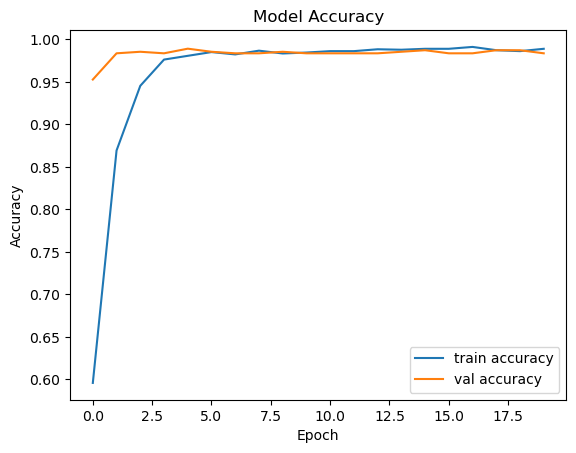

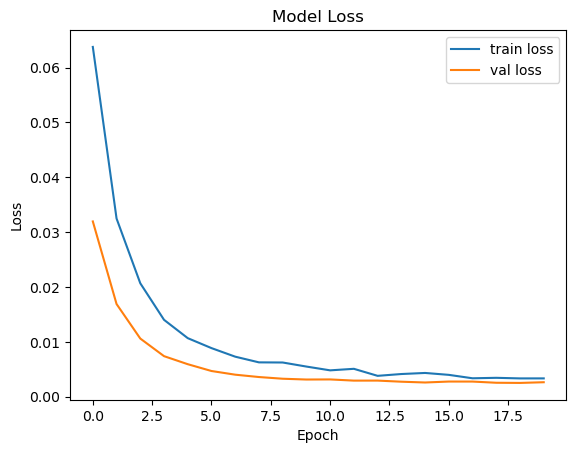

In [138]:
# path define 
dataset_path = '/Users/elloramallickbanerji/Documents/dataset'
split_dataset_path = '/Users/elloramallickbanerji/Documents/split_dataset'

# Focal Loss function (optional for class imbalance)
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)

        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        fl = - alpha_t * tf.keras.backend.pow((1. - p_t), gamma) * tf.keras.backend.log(p_t)
        return tf.keras.backend.mean(fl)
    
    return focal_loss_fixed

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data into train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(split_dataset_path, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(split_dataset_path, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(split_dataset_path, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define the VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to avoid overfitting
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model (VGG16 layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with AdamW optimizer and focal loss
model.compile(optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-5),
              loss=focal_loss(gamma=2., alpha=0.25),
              metrics=['accuracy'])

# Early stopping and reduce learning rate callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions and classification report
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=['Normal', 'PCOS']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

# Optionally, plot the training and validation accuracy/loss curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [146]:
print(test_generator.class_indices)

{'PCOS': 0, 'normal': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


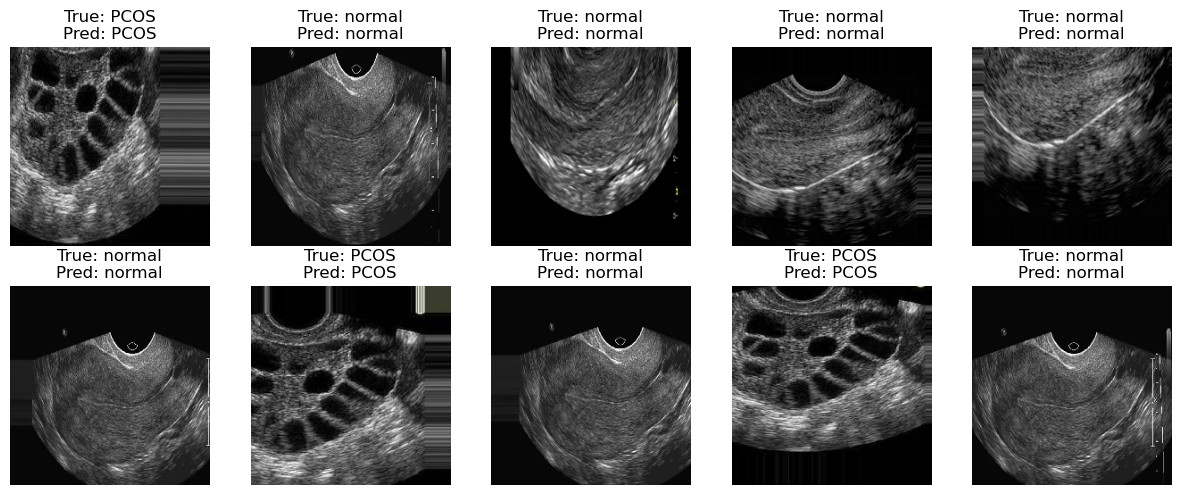

In [148]:
# Function to display images along with true and predicted labels
def visualize_predictions(model, test_generator, class_names, num_images=10):
    # Get a batch of test data
    test_images, test_labels = next(test_generator)
    
    # Get predictions for this batch
    predictions = model.predict(test_images)
    predictions_classes = (predictions > 0.5).astype(int).reshape(-1)
    
    # Map class indices for correct labeling
    index_to_class = {v: k for k, v in test_generator.class_indices.items()}  # {'Normal': 0, 'PCOS': 1}
    
    # Plot the images with their true and predicted labels
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.imshow(test_images[i])
        
        # Map numeric labels back to class names
        true_label = index_to_class[int(test_labels[i])]
        predicted_label = index_to_class[predictions_classes[i]]
        
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Call the visualization function
class_names = ['Normal', 'PCOS']
visualize_predictions(model, test_generator, class_names)
